In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/lending_club_loan_two.csv")

print('First five rows:\n',df.head(5))
# Basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())
print("\nNumerical Summary:\n", df.describe())
print("\nCategorical Summary:\n", df.describe(include="object"))



First five rows:
    loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                 

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/lending_club_loan_two.csv")
cat_cols = df1.select_dtypes(include=["object"]).columns

for col in cat_cols:
  print(col,':\n')
  print(df1[col].value_counts())

term :

term
36 months    302005
60 months     94025
Name: count, dtype: int64
grade :

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64
sub_grade :

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64
emp_title :

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
                            ... 
OMIV Supervisor                1
SVP, Technology                1
sikorsky                       1
Postman

# 🧭 Overview on dataset


- **Dataset Size:**  
  The dataset contains **396,030 loan records** with **27 features**. This is a large dataset, suitable for detailed analysis and predictive modeling.  

- **Loan Information:**  
  - Loan amounts range from **$500 to $40,000**, with an **average of ~$14,000**.  
  
  - Interest rates vary between **5.32% and 30.99%**, averaging around **13.6%**.  
  - Installments (monthly payments) average **$432**, depending on loan amount and term.  

- **Loan Terms:**  
  - Two available terms: **36 months** and **60 months**.  
  - **36 months** is the most common (over 300k loans).  

- **Credit Grades:**  
  - Loans are grouped into **grades (A–G)** and finer **sub-grades (35 levels)**.  
  - Most loans fall under **Grade B (~116k loans)**, showing borrowers are usually moderate risk.  

- **Employment & Income:**  
  
  - Over **173k unique job titles**; "Teacher" is most frequent.  
  
  - Employment length: **10+ years** is most common (~126k borrowers).  
  
  - Annual income averages **$74k, but extreme outliers reach $8.7M.  

- **Home Ownership:**  
  - Most borrowers either **have a mortgage** or **rent**.  
  - Mortgage holders make up ~198k records.  

- **Credit & Debt Profile:**  
  - Average of **11 open credit lines** and **25 total accounts**, though some have 150+.  
  - **Revolving balance (credit card debt)** averages **$15.8k**.  
  - **Revolving utilization ratio** averages **53%**, with extreme outliers >800% (potential anomalies).  

- **Public Records & Bankruptcies:**  
  - Majority have **0 derogatory public records (89%)**.  
  - Bankruptcy is rare, with mean **0.12 per borrower**.  

- **Application Type & Status:**  
  - Most applications are **individual (~395k)**, very few are joint.  
  - Initial list status is mainly **“f” (fully funded)**.  

- **Missing Data:**  
  Some columns have missing values that need imputation:  
  - `emp_title` (~6%)  
  - `emp_length` (~5%)  
  - `title` (~0.5%)  
  - `revol_util` (~0.07%)  
  - `mort_acc` (~10%)  
  - `pub_rec_bankruptcies` (~0.1%)  

---

✅ **Key Takeaway:**  
The dataset is **large, diverse, and detailed**. It has a mix of **categorical and numerical features** that can strongly influence loan default prediction. However, there are **outliers and missing values** that should be addressed before modeling.  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

loan_status counts:
 loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

loan_status percentages:
 loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64


/tmp/ipython-input-1963844039.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=df, palette=["skyblue", "salmon"])


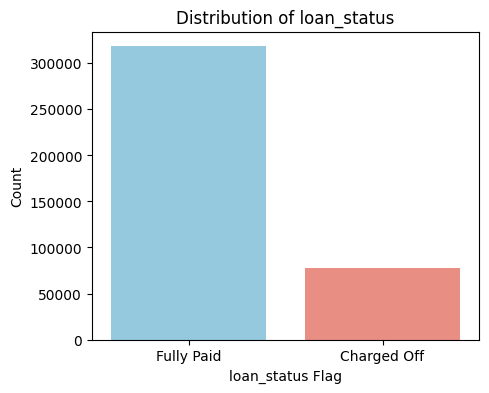

In [ ]:
#Target Variable analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Value counts & percentages
vc = df["loan_status"].value_counts()
vc_pct = df["loan_status"].value_counts(normalize=True) * 100
print("loan_status counts:\n", vc)
print("\nloan_status percentages:\n", vc_pct)

# Plot
plt.figure(figsize=(5,4))
sns.countplot(x="loan_status", data=df, palette=["skyblue", "salmon"])
plt.title("Distribution of loan_status")
plt.xlabel("loan_status Flag")
plt.ylabel("Count")
plt.show()

# 🎯 Target Variable Analysis – Loan Status

- **Loan Status Distribution:**  
  - **Fully Paid:** 318,357 loans (**80.39%**)  
  - **Charged Off (Defaulted):** 77,673 loans (**19.61%**)  

- **Insights:**  
  1. The dataset is **imbalanced** – a large majority of loans are **fully paid**, while ~20% are **defaults/charged off**.  
  2. Although the imbalance is not extreme, it is still significant and needs to be addressed when building predictive models (e.g., using resampling techniques or adjusting evaluation metrics).  
  3. The **19.6% default rate** indicates that nearly 1 in 5 borrowers fail to repay their loan, which is a substantial risk for lenders.  
  4. This variable (`loan_status`) will serve as the **target label** for classification models, with `"Fully Paid"` considered **non-default (0)** and `"Charged Off"` considered **default (1)**.  

✅ **Key Takeaway:** The target variable clearly separates good borrowers (80%) from risky borrowers (20%), but the imbalance must be handled to avoid biased predictions.


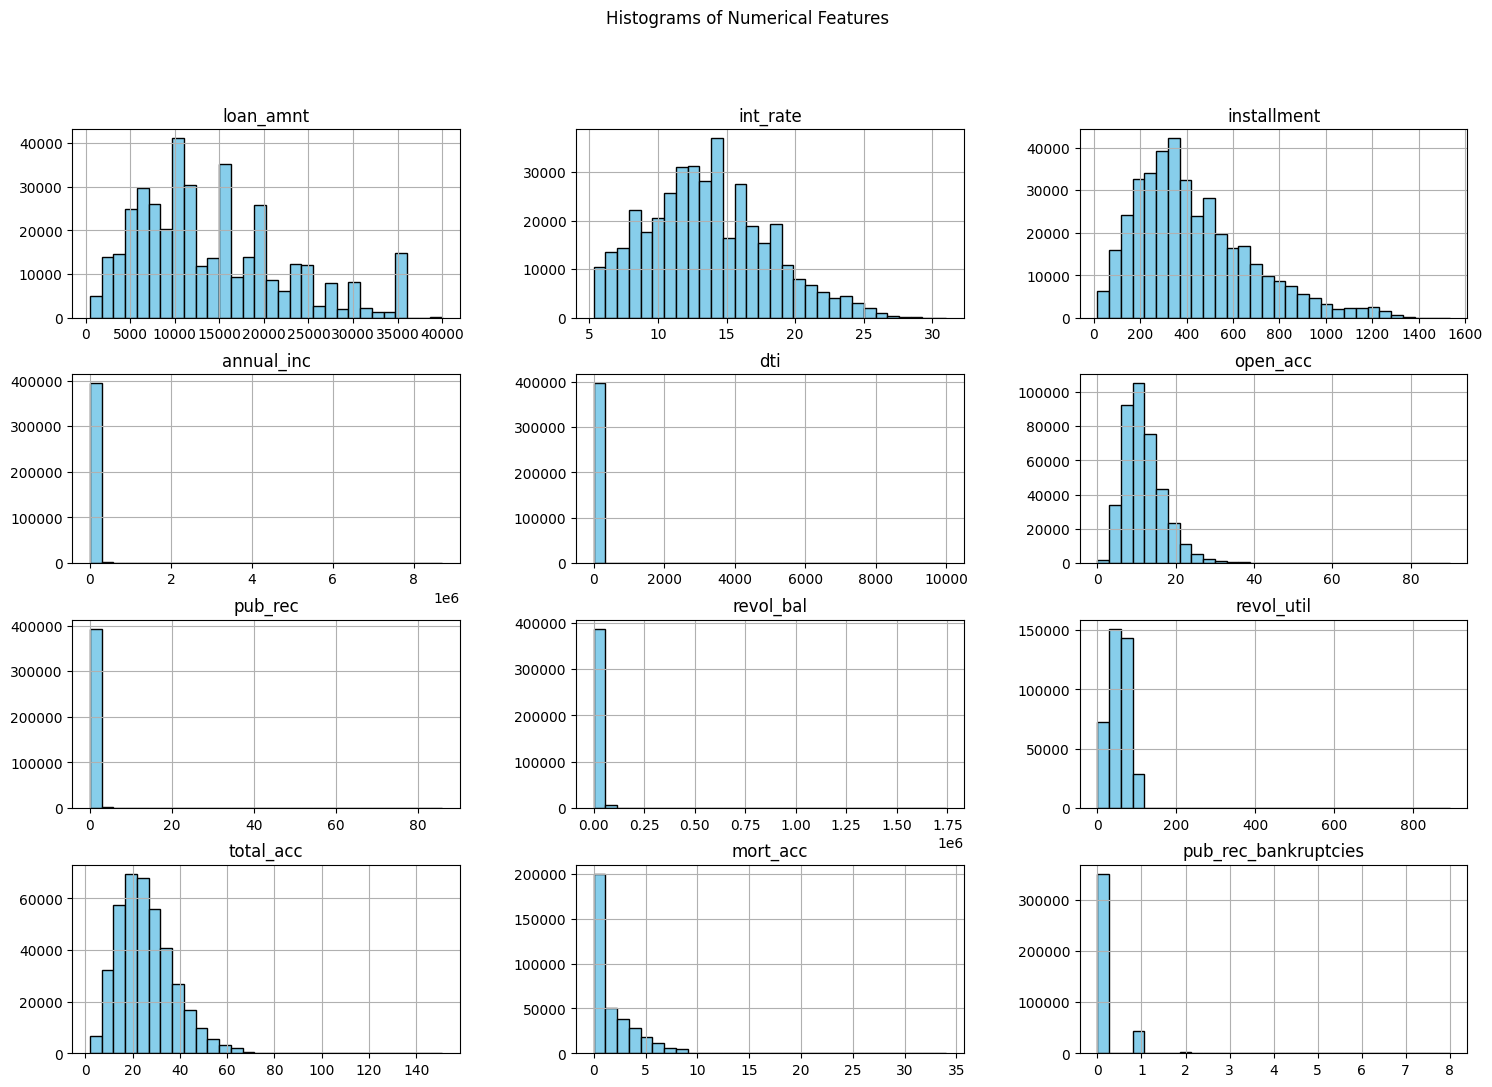

In [ ]:
# =======================
#  NUMERICAL FEATURES DISTRIBUTION
# =======================
num_cols = df.select_dtypes(include=["float64","int64"]).columns

df[num_cols].hist(bins=30, figsize=(18, 12), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

/tmp/ipython-input-3413879130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="Set2")


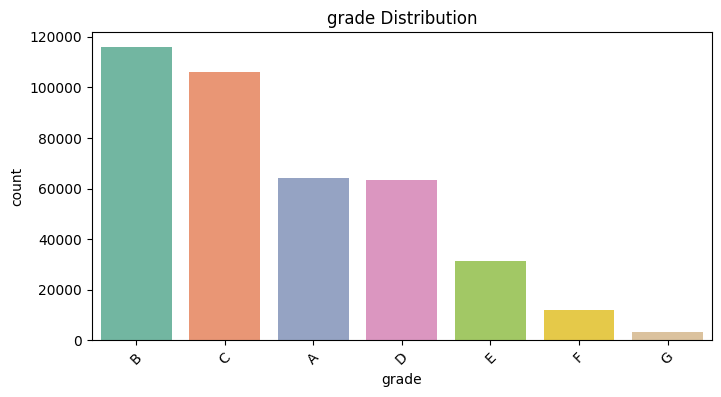

/tmp/ipython-input-3413879130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="Set2")


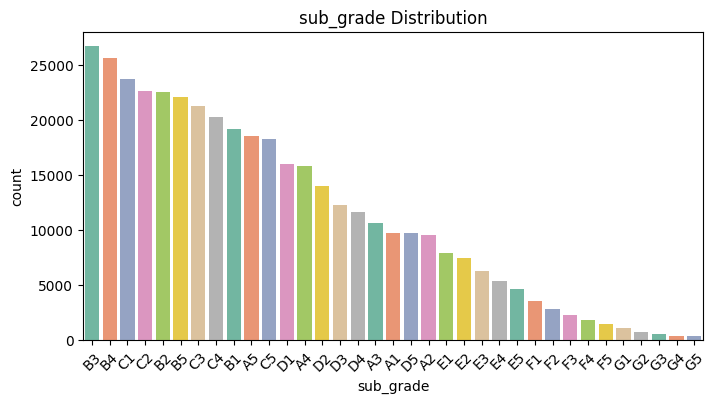

/tmp/ipython-input-3413879130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="Set2")


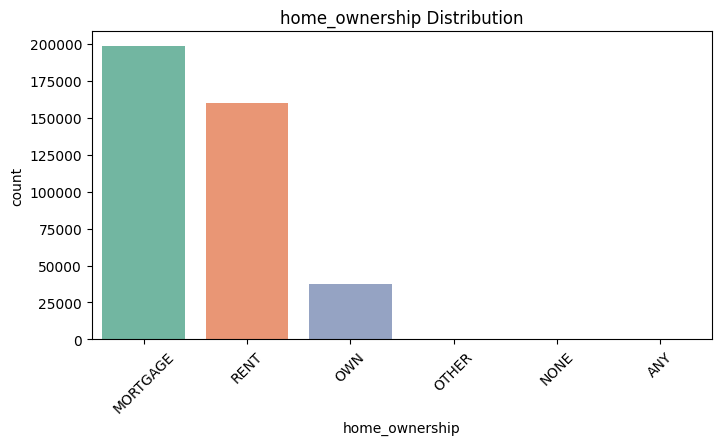

/tmp/ipython-input-3413879130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="Set2")


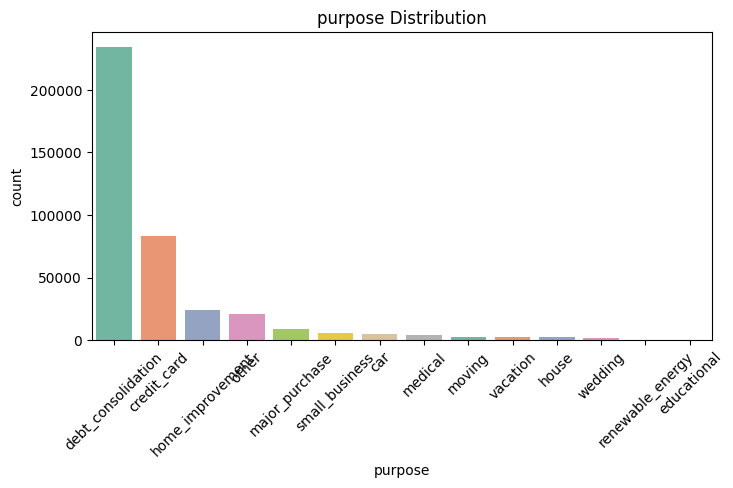

/tmp/ipython-input-3413879130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="Set2")


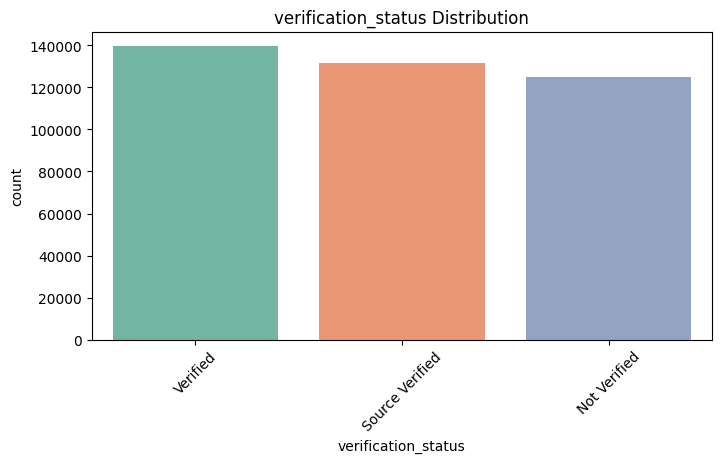

In [ ]:
# =======================
# CATEGORICAL FEATURES
# =======================
cat_cols = df.select_dtypes(include=["object"]).columns

for col in ["grade", "sub_grade", "home_ownership", "purpose", "verification_status"]:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="Set2")
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipython-input-2316085631.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y="loan_amnt", data=df, palette="coolwarm")


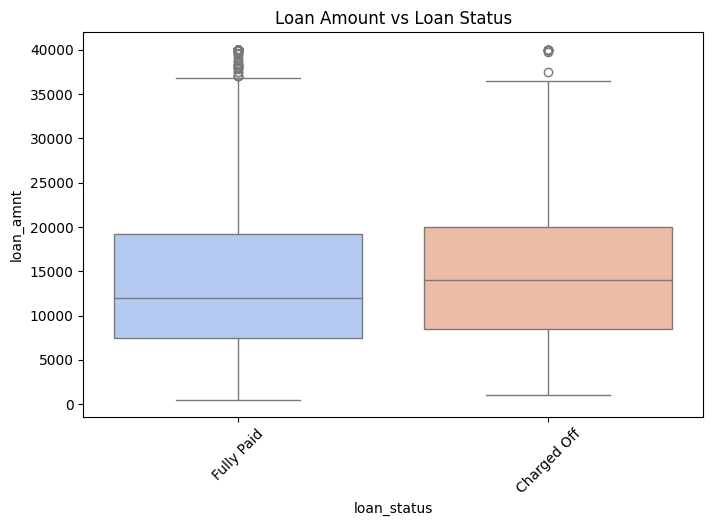

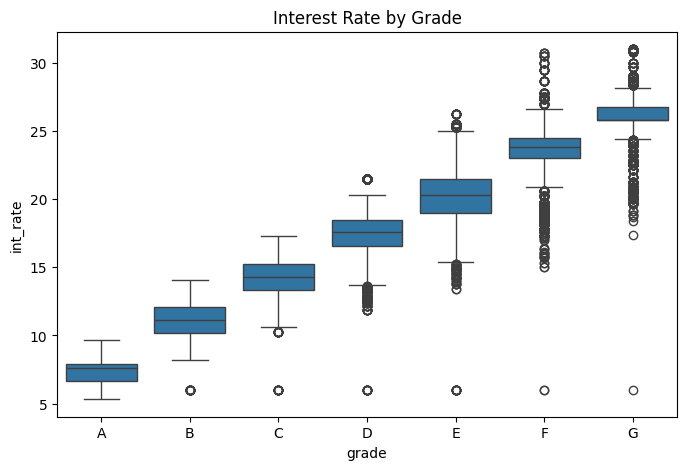

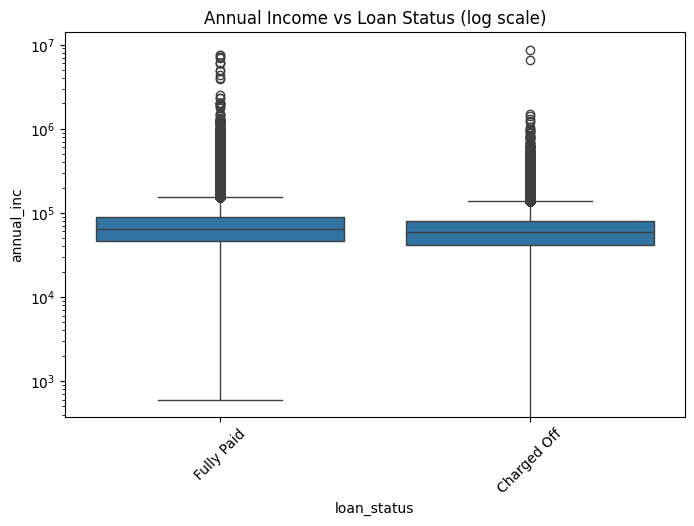

In [ ]:
# =======================
#  RELATIONSHIPS
# =======================

# Loan Amount vs Loan Status
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="loan_amnt", data=df, palette="coolwarm")
plt.title("Loan Amount vs Loan Status")
plt.xticks(rotation=45)
plt.show()

# Interest Rate vs Grade
plt.figure(figsize=(8,5))
sns.boxplot(x="grade", y="int_rate", data=df, order=sorted(df["grade"].unique()))
plt.title("Interest Rate by Grade")
plt.show()

# Annual Income vs Loan Status (log scale due to skewness)
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="annual_inc", data=df)
plt.yscale("log")
plt.title("Annual Income vs Loan Status (log scale)")
plt.xticks(rotation=45)
plt.show()

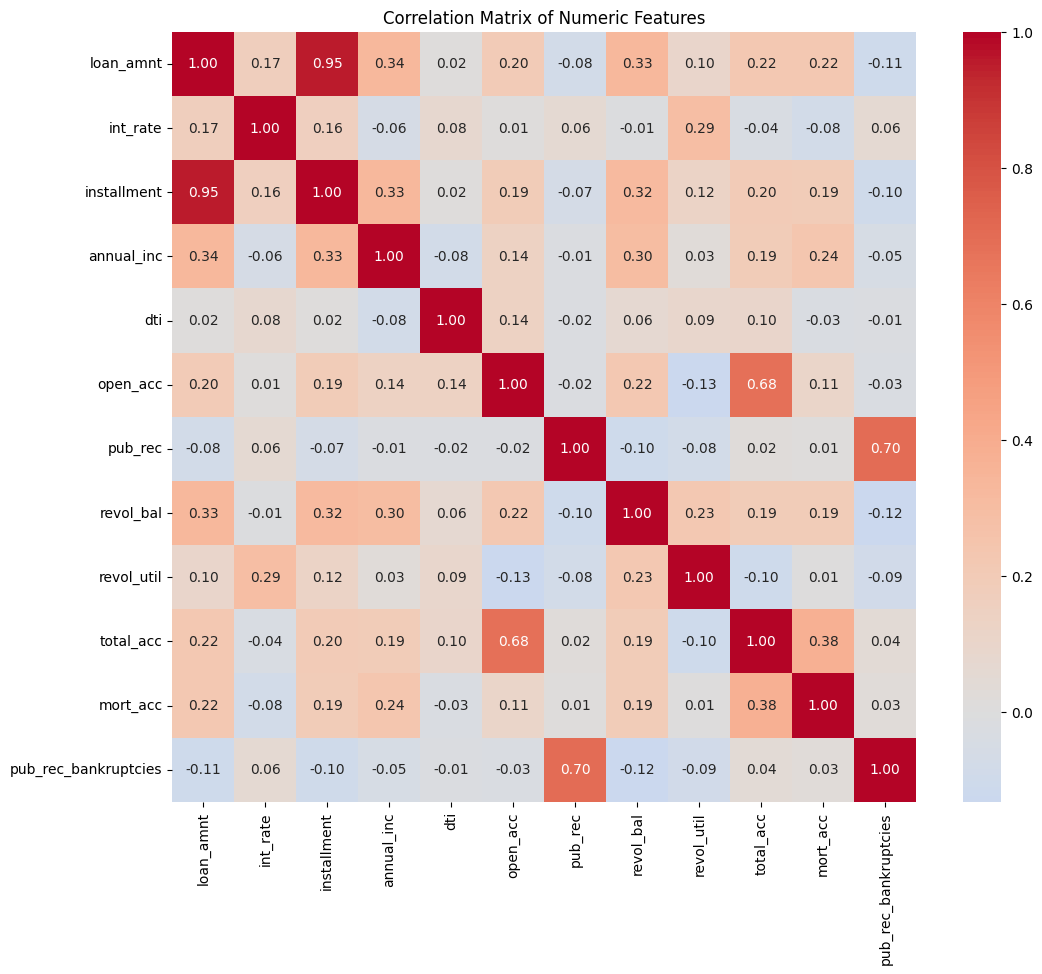

In [ ]:
# =======================
# CORRELATION HEATMAP
# =======================
# Numerical correlation matrix
num_df = df.select_dtypes(include=["int64", "float64"])
corr = num_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f",cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


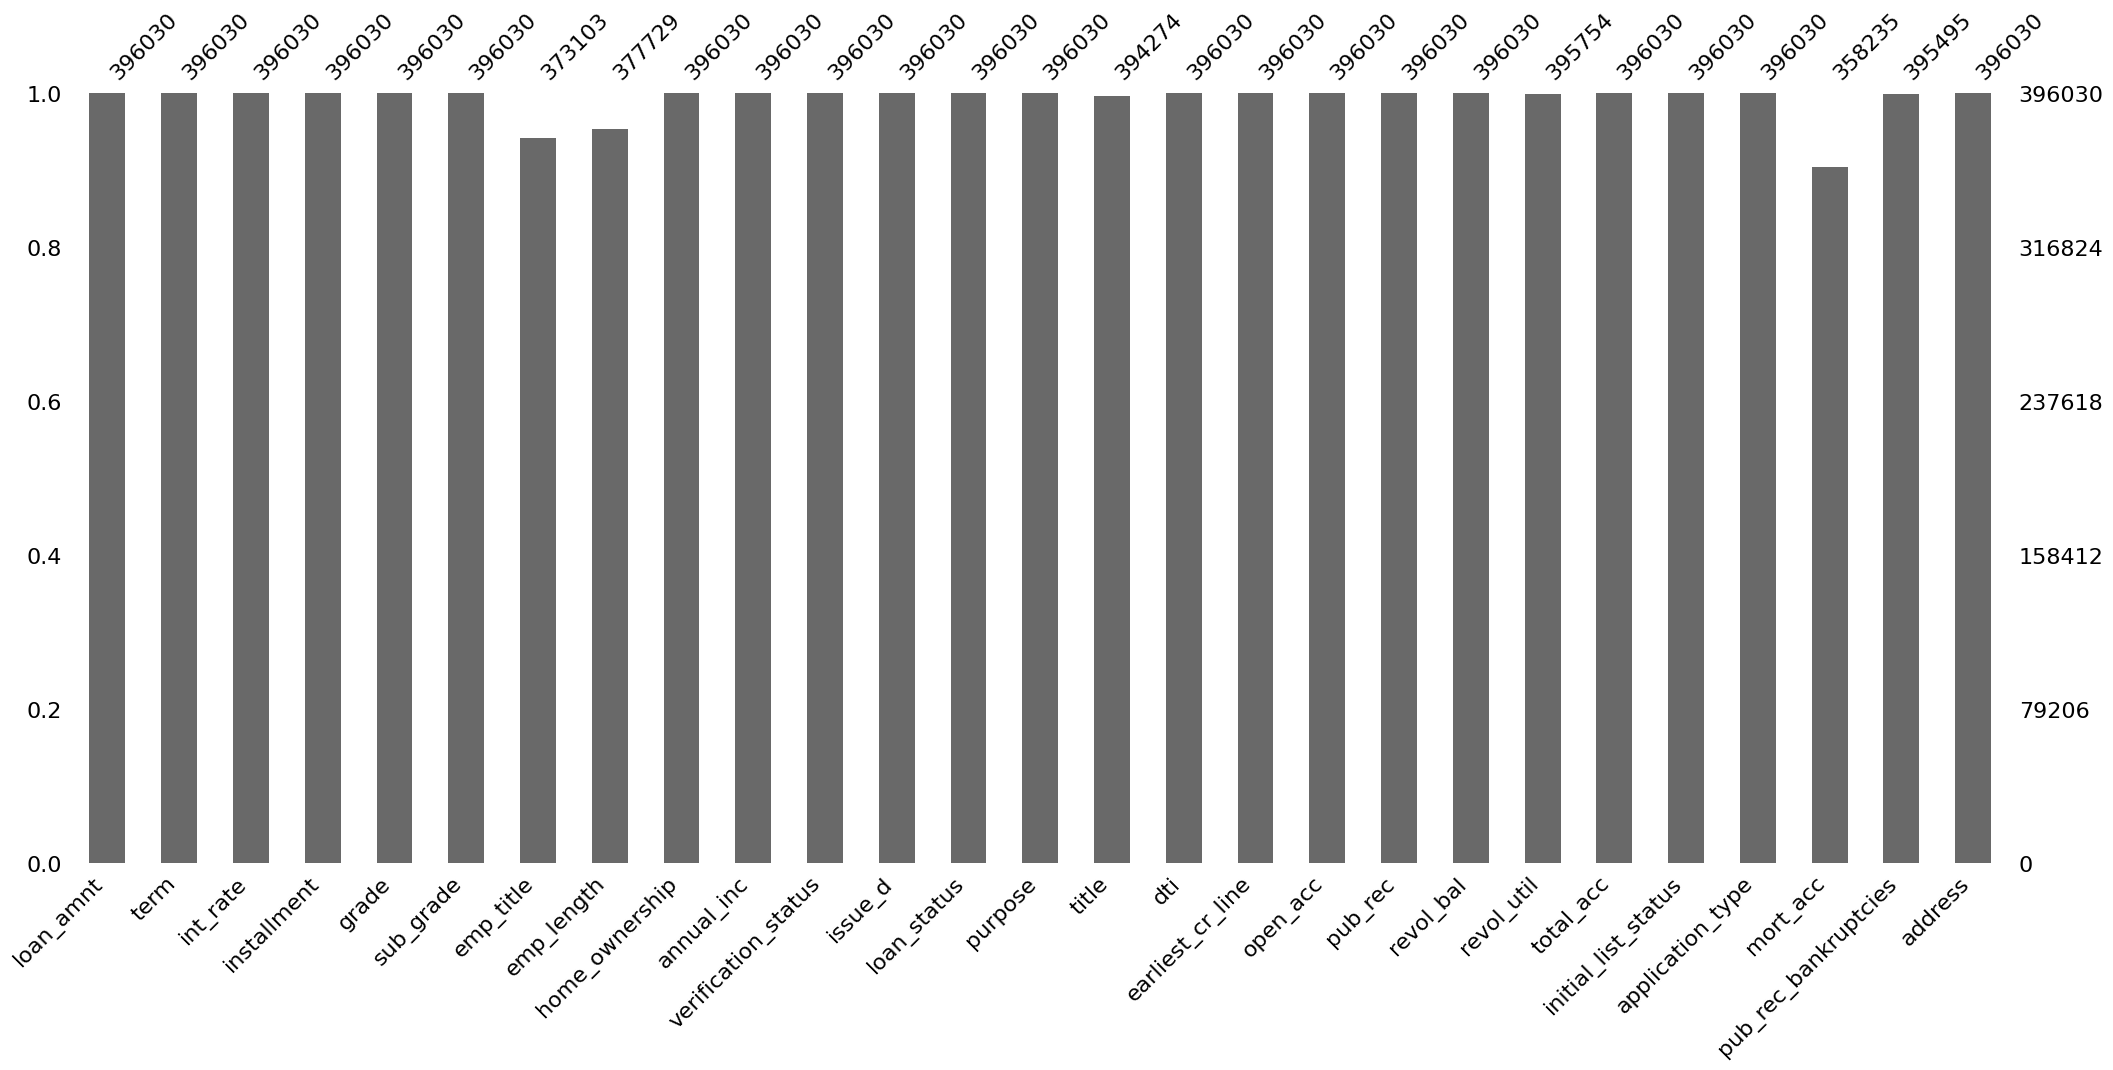

In [ ]:
# =======================
# MISSING VALUE VISUALIZATION
# =======================
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
# =======================
#  HANDLE MISSING VALUES
# =======================
# Numerical: fill with median
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical: fill with mode
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nAfter handling missing values:\n", df.isnull().sum().sum(), " missing values remain")


/tmp/ipython-input-1085152863.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1085152863.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi


After handling missing values:
 0  missing values remain


In [ ]:
# ----------------------------
#  Feature Engineering
# ----------------------------
# Convert term: "36 months" → 36
df["term"] = df["term"].str.replace(" months", "").astype(int)

# Convert emp_length: "10+ years", "< 1 year", etc.
def clean_emp_length(x):
    if "<" in str(x):
        return 0
    elif "10+" in str(x):
        return 10
    elif x == "n/a":
        return 0
    else:
        try:
            return int(x.split()[0])
        except:
            return 0

df["emp_length"] = df["emp_length"].apply(clean_emp_length)


# Drop irrelevant / high-cardinality columns
df.drop(columns=["address", "emp_title", "title"], inplace=True, errors="ignore")

print("Feature engineering done")


Feature engineering done


In [ ]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B,B4,10,RENT,117000.0,Not Verified,...,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36,11.99,265.68,B,B5,4,MORTGAGE,65000.0,Not Verified,...,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36,10.49,506.97,B,B3,0,RENT,43057.0,Source Verified,...,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36,6.49,220.65,A,A2,6,RENT,54000.0,Not Verified,...,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60,17.27,609.33,C,C5,9,MORTGAGE,55000.0,Verified,...,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
5,20000.0,36,13.33,677.07,C,C3,10,MORTGAGE,86788.0,Verified,...,Jan-2005,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0
6,18000.0,36,5.32,542.07,A,A1,2,MORTGAGE,125000.0,Source Verified,...,Aug-2005,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0
7,13000.0,36,11.14,426.47,B,B2,10,RENT,46000.0,Not Verified,...,Sep-1994,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0
8,18900.0,60,10.99,410.84,B,B3,10,RENT,103000.0,Verified,...,Jun-1994,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0
9,26300.0,36,16.29,928.40,C,C5,3,MORTGAGE,115000.0,Verified,...,Dec-1997,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0


In [ ]:
# ----------------------------
#  Scale Numerical Features
# ----------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

df[num_cols] = scaler.fit_transform(df[num_cols])
print(df)
print("Scaling done")

        loan_amnt      term  int_rate  installment grade sub_grade  \
0       -0.492243 -0.557975 -0.491799    -0.408291     B        B4   
1       -0.731551 -0.557975 -0.368816    -0.662750     B        B5   
2        0.177819 -0.557975 -0.704225     0.299609     B        B3   
3       -0.827274 -0.557975 -1.598649    -0.842348     A        A2   
4        1.227783  1.792196  0.811824     0.707861     C        C5   
...           ...       ...       ...          ...   ...       ...   
396025  -0.492243  1.792196 -0.592422    -0.855390     B        B4   
396026   0.823951 -0.557975 -0.301734     1.071164     C        C1   
396027  -1.090513 -0.557975 -0.816028    -1.078979     B        B1   
396028   0.823951  1.792196  0.373556     0.283855     C        C2   
396029  -1.449475 -0.557975 -0.006574    -1.451256     C        C2   

        emp_length home_ownership  annual_inc verification_status  ...  \
0         1.058091           RENT    0.694330        Not Verified  ...   
1        -0

In [ ]:
# Encoding target colum (label)

df['loan_status'] = df['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

In [ ]:
# ----------------------------
# Encode Categorical Features (One-Hot)
# ----------------------------
df = pd.get_dummies(df, drop_first=True)
print("✅ One-hot encoding done. New shape:", df.shape)
print(df.head())

✅ One-hot encoding done. New shape: (396030, 875)
   loan_amnt      term  int_rate  installment  emp_length  annual_inc  \
0  -0.492243 -0.557975 -0.491799    -0.408291    1.058091    0.694330   
1  -0.731551 -0.557975 -0.368816    -0.662750   -0.580777   -0.149311   
2   0.177819 -0.557975 -0.704225     0.299609   -1.673355   -0.505312   
3  -0.827274 -0.557975 -1.598649    -0.842348   -0.034487   -0.327774   
4   1.227783  1.792196  0.811824     0.707861    0.784946   -0.311550   

   loan_status       dti  open_acc   pub_rec  ...  earliest_cr_line_Sep-2007  \
0            0  0.491728  0.912646 -0.335785  ...                      False   
1            0  0.259197  1.107287 -0.335785  ...                      False   
2            0 -0.254703  0.328720 -0.335785  ...                      False   
3            0 -0.820215 -1.033772 -0.335785  ...                      False   
4            1  0.919608  0.328720 -0.335785  ...                      False   

   earliest_cr_line_Sep-2008  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ----------------------------
#  Train-Test Split
# ----------------------------
# Target column = loan_status (assume it’s binary: Fully Paid / Charged Off etc.)
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Encode target if it's categorical
y = y.astype("category").cat.codes  # converts categories into 0/1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ----------------------------
#  Train-Test Split
# ----------------------------
# Target column = loan_status (assume it’s binary: Fully Paid / Charged Off etc.)
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Encode target if it's categorical
y = y.astype("category").cat.codes  # converts categories into 0/1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ----------------------------
#  Logistic Regression Model
# ----------------------------
model = LogisticRegression(max_iter=1000, solver="lbfgs")
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)


✅ Logistic Regression Evaluation
Accuracy: 0.8078554654950383

Confusion Matrix:
 [[62675   996]
 [14223  1312]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     63671
           1       0.57      0.08      0.15     15535

    accuracy                           0.81     79206
   macro avg       0.69      0.53      0.52     79206
weighted avg       0.77      0.81      0.75     79206

ROC-AUC Score: 0.7199452132120059


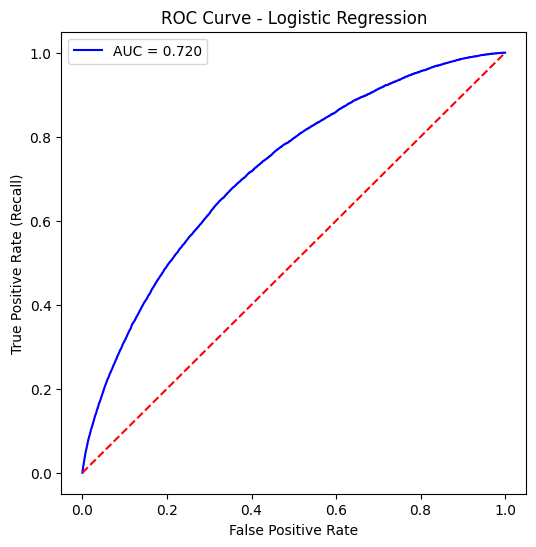

In [ ]:
# ----------------------------
# Evaluation
# ----------------------------
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # probabilities for positive class

print("\n✅ Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- ROC Curve and AUC ---
auc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


#Logistic Regression Evaluation Insights

- Accuracy: 0.81 — The model correctly predicts around 81% of loans overall.

###Confusion Matrix:

- True Positives (loan repaid) = 62675, True Negatives (loan default) = 1312

- False Positives = 996, False Negatives = 14223

- Insight: Model predicts repaid loans well but struggles to identify defaults.

###Precision & Recall:

- Class 0 (repaid): Precision = 0.82, Recall = 0.98 → Most good borrowers correctly classified.

- Class 1 (default): Precision = 0.57, Recall = 0.08 → Many defaulters are misclassified.

 F1-Score: Low for defaults (0.15), high for repaid loans (0.89) — highlights class imbalance.

ROC-AUC Score: 0.72 → Moderate ability to rank risky vs safe borrowers.

Overall Insight: Logistic Regression works as a baseline model, accurately predicting the majority class (repaid loans), but is limited in detecting high-risk borrowers. Advanced models like XGBoost or LightGBM improve detection of defaulters.


### Task on October 6

In [ ]:
!pip install xgboost lightgbm --quiet

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  Train XGBoost Model

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:02:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
#  Train LightGBM Model

lgb_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62138, number of negative: 254686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3395
[LightGBM] [Info] Number of data points in the train set: 316824, number of used features: 708
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196128 -> initscore=-1.410674
[LightGBM] [Info] Start training from score -1.410674


In [ ]:
import joblib

# Save trained LightGBM model
joblib.dump(lgb_model, "trained_credit_model.pkl")

# Optional: save the scaler and feature columns if preprocessing is needed in backend
joblib.dump(scaler, "scaler.pkl")  # numerical scaling
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")  # all columns after one-hot


['feature_columns.pkl']

In [ ]:
#  Evaluation Function

def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n{'='*30}\n{name} Evaluation\n{'='*30}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    auc = roc_auc_score(y_true, y_prob)
    print(f"AUC-ROC Score: {auc:.4f}")
    return auc

auc_xgb = evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)
auc_lgb = evaluate_model("LightGBM", y_test, y_pred_lgb, y_prob_lgb)



XGBoost Evaluation
Confusion Matrix:
 [[62752   919]
 [14266  1269]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89     63671
           1       0.58      0.08      0.14     15535

    accuracy                           0.81     79206
   macro avg       0.70      0.53      0.52     79206
weighted avg       0.77      0.81      0.75     79206

AUC-ROC Score: 0.7281

LightGBM Evaluation
Confusion Matrix:
 [[62583  1088]
 [14080  1455]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     63671
           1       0.57      0.09      0.16     15535

    accuracy                           0.81     79206
   macro avg       0.69      0.54      0.53     79206
weighted avg       0.77      0.81      0.75     79206

AUC-ROC Score: 0.7296


## Observation
- LightGBM and XGBoost were used to predict borrower credit risk, with LightGBM performing slightly better (AUC-ROC 0.7293).

- Models accurately identified good borrowers but had lower recall for defaulters due to class imbalance.

- Borrowers were categorized by risk level (Low to Critical) with recommended actions for data-driven loan decisions.

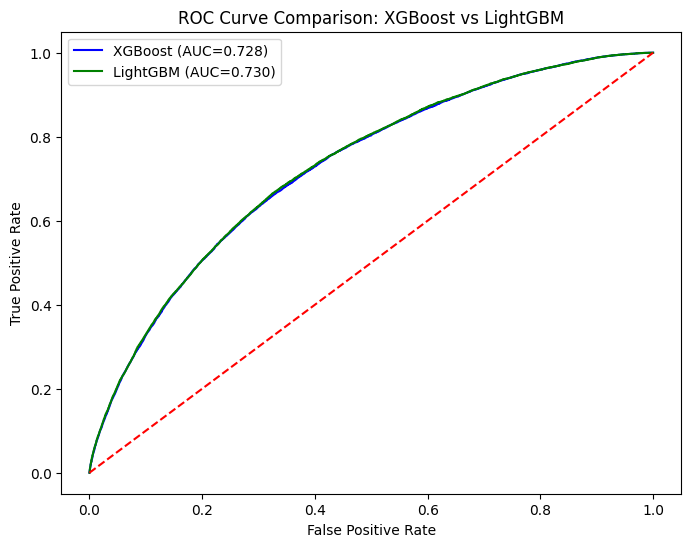

In [ ]:
#  Plot ROC Curve Comparison

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})", color='blue')
plt.plot(fpr_lgb, tpr_lgb, label=f"LightGBM (AUC={auc_lgb:.3f})", color='green')
plt.plot([0,1],[0,1],'--', color='red')
plt.title("ROC Curve Comparison: XGBoost vs LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

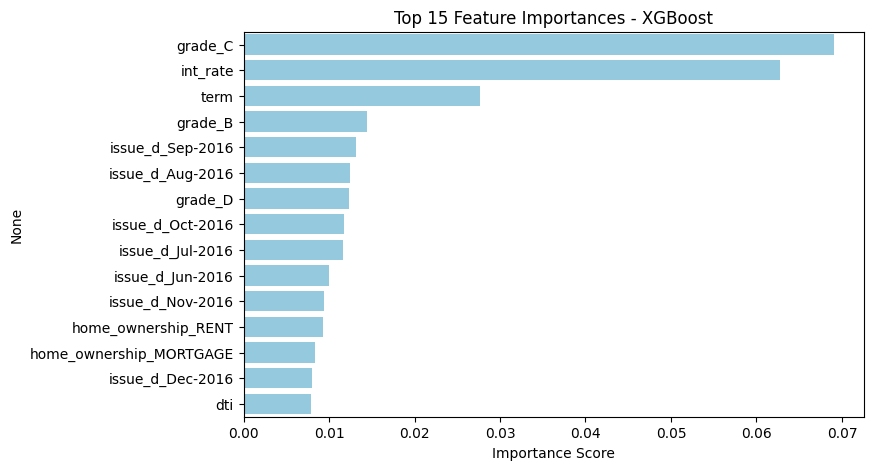

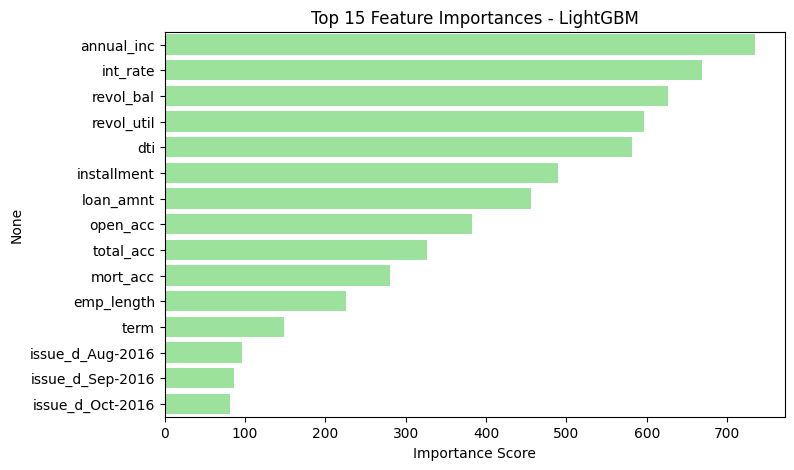

In [ ]:
#  Feature Importance Comparison

# XGBoost Feature Importance
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index, color='skyblue')
plt.title("Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.show()

# LightGBM Feature Importance
lgb_importance = pd.Series(lgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=lgb_importance.values, y=lgb_importance.index, color='lightgreen')
plt.title("Top 15 Feature Importances - LightGBM")
plt.xlabel("Importance Score")
plt.show()


🔝 Top 20 Borrowers with Highest Predicted Default Risk (XGBoost):


,Pred_Prob_XGB,Risk_Level,Recommended_Action
183023,0.774752,High Risk,Reduce loan amount; increase interest rate; ve...
144380,0.757864,High Risk,Reduce loan amount; increase interest rate; ve...
101936,0.750856,High Risk,Reduce loan amount; increase interest rate; ve...
322203,0.745003,Medium Risk,Monitor borrower closely; offer financial coun...
326948,0.735664,Medium Risk,Monitor borrower closely; offer financial coun...
38741,0.731914,Medium Risk,Monitor borrower closely; offer financial coun...
380429,0.730734,Medium Risk,Monitor borrower closely; offer financial coun...
58331,0.724791,Medium Risk,Monitor borrower closely; offer financial coun...
15437,0.722606,Medium Risk,Monitor borrower closely; offer financial coun...
181177,0.719661,Medium Risk,Monitor borrower closely; offer financial coun...


/tmp/ipython-input-141304435.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=results, x='Risk_Level', order=["Low Risk","Medium Risk","High Risk","Critical Risk"], palette='coolwarm')


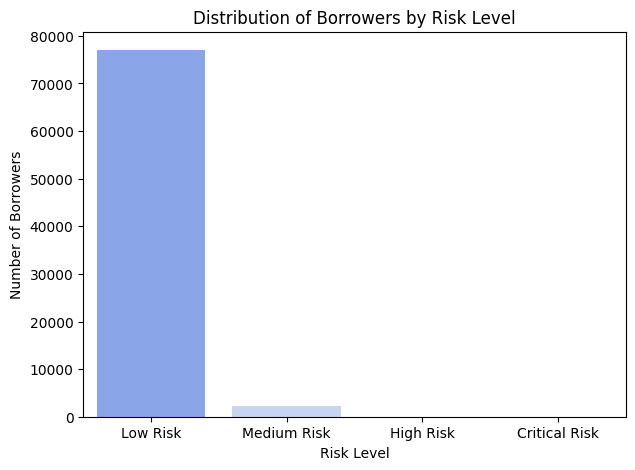


✅ Borrower_Risk_Actions.csv saved successfully!


In [ ]:
#  MAP TOP BORROWERS TO RECOMMENDED ACTIONS

# We'll use XGBoost probabilities for risk ranking
results = X_test.copy()
results['Actual'] = y_test.values
results['Pred_Prob_XGB'] = y_prob_xgb
results['Pred_Prob_LGB'] = y_prob_lgb

# Define Risk Levels Based on Predicted Probability

def risk_category(prob):
    if prob >= 0.90:
        return "Critical Risk"
    elif prob >= 0.75:
        return "High Risk"
    elif prob >= 0.50:
        return "Medium Risk"
    else:
        return "Low Risk"

results['Risk_Level'] = results['Pred_Prob_XGB'].apply(risk_category)

# Define Recommended Actions per Risk Level

def recommend_action(risk):
    if risk == "Critical Risk":
        return "Reject loan OR require strong collateral & co-signer"
    elif risk == "High Risk":
        return "Reduce loan amount; increase interest rate; verify income"
    elif risk == "Medium Risk":
        return "Monitor borrower closely; offer financial counseling"
    else:
        return "Approve with standard terms; send regular payment reminders"

results['Recommended_Action'] = results['Risk_Level'].apply(recommend_action)

# Get Top Borrowers by Predicted Risk

top_borrowers = results.sort_values(by='Pred_Prob_XGB', ascending=False).head(20)

print("\n🔝 Top 20 Borrowers with Highest Predicted Default Risk (XGBoost):")
display(top_borrowers[['Pred_Prob_XGB', 'Risk_Level', 'Recommended_Action']].head(20))


# Visualize Risk Distribution

plt.figure(figsize=(7,5))
sns.countplot(data=results, x='Risk_Level', order=["Low Risk","Medium Risk","High Risk","Critical Risk"], palette='coolwarm')
plt.title("Distribution of Borrowers by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Number of Borrowers")
plt.show()


results[['Pred_Prob_XGB','Risk_Level','Recommended_Action']].to_csv("Borrower_Risk_Actions.csv", index=False)
print("\n✅ Borrower_Risk_Actions.csv saved successfully!")


# Step wise tuning for XGBoost

In [ ]:
# 1️⃣ Stepwise Tuning for XGBoost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Base model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 1: Tune max_depth
param_grid_1 = {'max_depth': [3, 4, 5, 6]}
grid_1 = GridSearchCV(xgb_model, param_grid_1, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_1.fit(X_train, y_train)
best_max_depth = grid_1.best_params_['max_depth']
print("Best max_depth:", best_max_depth)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:18:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best max_depth: 4


In [ ]:
# Step 2: Tune learning_rate (fixing best max_depth)
xgb_model.set_params(max_depth=best_max_depth)
param_grid_2 = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid_2 = GridSearchCV(xgb_model, param_grid_2, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_2.fit(X_train, y_train)
best_learning_rate = grid_2.best_params_['learning_rate']
print("Best learning_rate:", best_learning_rate)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:32:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best learning_rate: 0.2


In [ ]:
# Step 3: Tune n_estimators (fix previous params)
xgb_model.set_params(max_depth=best_max_depth, learning_rate=best_learning_rate)
param_grid_3 = {'n_estimators': [100, 200, 300]}
grid_3 = GridSearchCV(xgb_model, param_grid_3, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_3.fit(X_train, y_train)
best_n_estimators = grid_3.best_params_['n_estimators']
print("Best n_estimators:", best_n_estimators)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:45:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best n_estimators: 300


In [ ]:
# Final best model
best_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    max_depth=best_max_depth,
    learning_rate=best_learning_rate,
    n_estimators=best_n_estimators
)

best_xgb.fit(X_train, y_train)
y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:47:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#  Stepwise Tuning for LightGBM

In [ ]:

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Base model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Step 1: Tune num_leaves
param_grid_1 = {'num_leaves': [31, 63, 127]}
grid_1 = GridSearchCV(lgb_model, param_grid_1, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_1.fit(X_train, y_train)
best_num_leaves = grid_1.best_params_['num_leaves']
print("Best num_leaves:", best_num_leaves)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62138, number of negative: 254686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3395
[LightGBM] [Info] Number of data points in the train set: 316824, number of used features: 708
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196128 -> initscore=-1.410674
[LightGBM] [Info] Start training from score -1.410674
Best num_leaves: 63


In [ ]:
# Step 2: Tune max_depth (fix num_leaves)
lgb_model.set_params(num_leaves=best_num_leaves)
param_grid_2 = {'max_depth': [5, 10, 15]}
grid_2 = GridSearchCV(lgb_model, param_grid_2, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_2.fit(X_train, y_train)
best_max_depth = grid_2.best_params_['max_depth']
print("Best max_depth:", best_max_depth)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62138, number of negative: 254686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3395
[LightGBM] [Info] Number of data points in the train set: 316824, number of used features: 708
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196128 -> initscore=-1.410674
[LightGBM] [Info] Start training from score -1.410674
Best max_depth: 15


In [ ]:
# Step 3: Tune learning_rate (fix previous)
lgb_model.set_params(num_leaves=best_num_leaves, max_depth=best_max_depth)
param_grid_3 = {'learning_rate': [0.01, 0.05, 0.1]}
grid_3 = GridSearchCV(lgb_model, param_grid_3, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_3.fit(X_train, y_train)
best_learning_rate = grid_3.best_params_['learning_rate']
print("Best learning_rate:", best_learning_rate)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62138, number of negative: 254686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3395
[LightGBM] [Info] Number of data points in the train set: 316824, number of used features: 708
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196128 -> initscore=-1.410674
[LightGBM] [Info] Start training from score -1.410674
Best learning_rate: 0.1


In [ ]:
# Step 4: Tune n_estimators (fix previous)
lgb_model.set_params(num_leaves=best_num_leaves, max_depth=best_max_depth, learning_rate=best_learning_rate)
param_grid_4 = {'n_estimators': [100, 200, 300]}
grid_4 = GridSearchCV(lgb_model, param_grid_4, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1)
grid_4.fit(X_train, y_train)
best_n_estimators = grid_4.best_params_['n_estimators']
print("Best n_estimators:", best_n_estimators)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62138, number of negative: 254686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3395
[LightGBM] [Info] Number of data points in the train set: 316824, number of used features: 708
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196128 -> initscore=-1.410674
[LightGBM] [Info] Start training from score -1.410674
Best n_estimators: 100


In [ ]:
# Final model
best_lgb = lgb.LGBMClassifier(
    random_state=42,
    num_leaves=best_num_leaves,
    max_depth=best_max_depth,
    learning_rate=best_learning_rate,
    n_estimators=best_n_estimators
)

best_lgb.fit(X_train, y_train)
y_pred_lgb = best_lgb.predict(X_test)
y_prob_lgb = best_lgb.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 62138, number of negative: 254686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.186096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3395
[LightGBM] [Info] Number of data points in the train set: 316824, number of used features: 708
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.196128 -> initscore=-1.410674
[LightGBM] [Info] Start training from score -1.410674


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("XGBoost AUC:", roc_auc_score(y_test, y_prob_xgb))
print("LightGBM AUC:", roc_auc_score(y_test, y_prob_lgb))

XGBoost AUC: 0.7286756387995241
LightGBM AUC: 0.7288776175131497


##Model Performance (AUC-ROC):

XGBoost: 0.7287

LightGBM: 0.7289

Both models show very similar discrimination ability in predicting loan defaults.